In [324]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
clinical_data = pd.merge(clinical_df, mouse_df, how="left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
clinical_data.head()




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [325]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_df = pd.DataFrame (clinical_data.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)']).reset_index()

# Preview DataFrame
tumor_df


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [326]:
#Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error = pd.DataFrame (clinical_data.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)'])

standard_error.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [327]:
# Minor Data Munging to Re-Format the Data Frames
tumor_df = pd.DataFrame (clinical_data.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)']).unstack(level=0)

# Preview that Reformatting worked
tumor_df.head()


Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

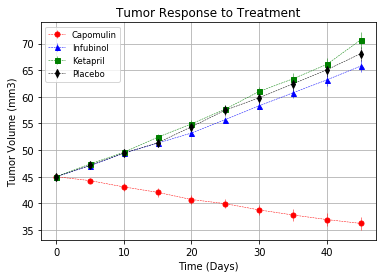

In [328]:
fig, ax = plt.subplots()

x_axis = tumor_df.index.values.tolist()

ax.errorbar(x_axis,tumor_df['Tumor Volume (mm3)']["Capomulin"], standard_error['Tumor Volume (mm3)']["Capomulin"], label='Capomulin', color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
ax.errorbar(x_axis,tumor_df['Tumor Volume (mm3)']["Infubinol"], standard_error['Tumor Volume (mm3)']["Infubinol"], label='Infubinol', color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
ax.errorbar(x_axis,tumor_df['Tumor Volume (mm3)']["Ketapril"], standard_error['Tumor Volume (mm3)']["Ketapril"], label='Ketapril', color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
ax.errorbar(x_axis,tumor_df['Tumor Volume (mm3)']["Placebo"], standard_error['Tumor Volume (mm3)']["Placebo"], label='Placebo', color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

plt.savefig("../Images/Volume_Response.png")

plt.show()

## Metastatic Response to Treatment

In [340]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_sites = pd.DataFrame (clinical_data.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites'])

# Preview DataFrame
metastatic_sites.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [341]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_error = pd.DataFrame (clinical_data.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites'])


# Preview DataFrame
metastatic_error.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [342]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_sites = pd.DataFrame (clinical_data.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites']).unstack(level=0)

# Preview that Reformatting worked
metastatic_sites.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

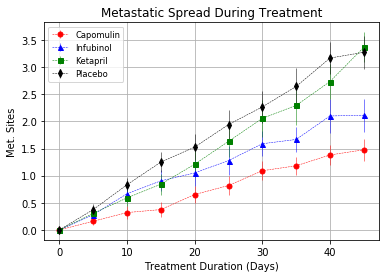

In [343]:
fig, ax = plt.subplots()

x_axis = metastatic_sites.index.values.tolist()

ax.errorbar(x_axis,metastatic_sites['Metastatic Sites']["Capomulin"], metastatic_error['Metastatic Sites']["Capomulin"], label='Capomulin', color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
ax.errorbar(x_axis,metastatic_sites['Metastatic Sites']["Infubinol"], metastatic_error['Metastatic Sites']["Infubinol"], label='Infubinol', color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
ax.errorbar(x_axis,metastatic_sites['Metastatic Sites']["Ketapril"], metastatic_error['Metastatic Sites']["Ketapril"], label='Ketapril', color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
ax.errorbar(x_axis,metastatic_sites['Metastatic Sites']["Placebo"], metastatic_error['Metastatic Sites']["Placebo"], label='Placebo', color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

plt.savefig("../Images/Metastatic_Spread.png")

plt.show()

## Survival Rates

In [344]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_df = pd.DataFrame (clinical_data.groupby(['Drug', 'Timepoint']).count()['Mouse ID']).reset_index()

# Preview DataFrame
mice_df.head()



,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [345]:
# Minor Data Munging to Re-Format the Data Frames
mice_df = pd.DataFrame (clinical_data.groupby(['Drug', 'Timepoint']).count()['Mouse ID']).unstack(level=0)

# Preview the Data Frame
mice_df.head()


Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

In [346]:
idx = pd.IndexSlice
survival = mice_df['Mouse ID'][['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]

c_total = mice_df['Mouse ID']['Capomulin'][0]
i_total = mice_df['Mouse ID']['Infubinol'][0]
k_total = mice_df['Mouse ID']['Ketapril'][0]
p_total = mice_df['Mouse ID']['Placebo'][0]

survival.loc[:, idx[['Capomulin']]] = (survival.loc[:, idx[['Capomulin']]])/c_total*100
survival.loc[:, idx[['Infubinol']]] = (survival.loc[:, idx[['Infubinol']]])/i_total*100
survival.loc[:, idx[['Ketapril']]] = (survival.loc[:, idx[['Ketapril']]])/k_total*100
survival.loc[:, idx[['Placebo']]] = (survival.loc[:, idx[['Placebo']]])/p_total*100


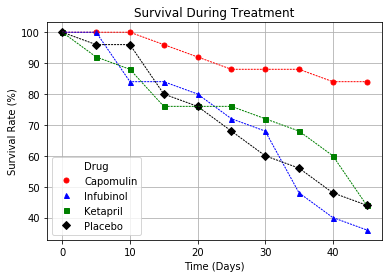

In [347]:
standard_error2 = pd.DataFrame (clinical_data.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)']).reset_index()

colors = ["red","blue","green","black"]

ax = survival.plot(figsize=(6,4), yerr = standard_error2, legend = False, colors= colors, dashes=[2, 1], linewidth=1)
survival.plot(figsize=(6,4), style=['ro', 'b^', 'gs', 'kD'], markersize=5, ax = ax)

plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()
plt.savefig("../Images/Survival_Rate.png")

plt.show()

## Summary Bar Graph

In [348]:
summary_df = tumor_df['Tumor Volume (mm3)'][['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]

# Display the data to confirm
tumor_df.columns

summary_df = pd.DataFrame (clinical_data.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)']).unstack(level=0)

for idx, data,  in summary_df.groupby(level=0)['Tumor Volume (mm3)']:
    if idx == 0:
        df1=data
    if idx == 45:
        df2=data

df1 = df1.reset_index()
df2= df2.reset_index()

average_df = (df2 - df1)/df1 *100
average_df = average_df.transpose()
average_df = average_df.reset_index()



In [349]:
# Store all Relevant Percent Changes into a Tuple
tuples = [tuple(x) for x in average_df.values]
tuples.pop(0)
tuples.pop(1)
tuples.pop(3)
tuples.pop(4)
tuples.pop(4)
tuples.pop(4)
tuples.pop(4)

('Zoniferol', 46.57975086509525)

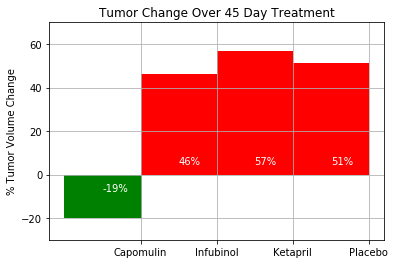

In [350]:
fig, ax = plt.subplots()

barlist = plt.bar(range(len(tuples)), [val[1] for val in tuples], align='center', color ='r', width=1)
barlist[0].set_color('g')

ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)


for i in range(len(tuples)):
    if i > 0:
        ax.text(i, 5 ,str('{:.0f}%'.format(tuples[i][1])), color="w" )
    else:
        ax.text(i, tuples[i][1] +12 ,str('{:.0f}%'.format(tuples[i][1])), color="w" )

plt.savefig("../Images/Summary.png")
plt.show()